# **Análise de dados de fundos de investimento**

Queremos responder algumas perguntas importantes, como:

1. Qual fundo do Brasil tem o maior PL (patrimônio líquido)?
2. Como obter a variação da cota para um fundo específico?
3. Como recuperar dados de um fundo específico sabendo apenas o seu nome?
4. Qual o fundo que teve a cota que mais subiu?
5. Qual o fundo que teve a cota que mais caiu?

Sobre a CVM: https://www.gov.br/cvm/pt-br/acesso-a-informacao-cvm/institucional/sobre-a-cvm






---






A CVM disponibiliza diversos dados do mercado financeiro nacional, como dados cadastrais, dos balanços e demonstrativos das empresas, demonstrativos de fundos imobiliários, dados de desempenho de fundos multimercado, dentre outros.

Plataforma de dados da CVM: https://dados.cvm.gov.br/

**O que encontramos lá dentro?**

Este é o repositório da CVM que contém os dados de cotas para todos os fundos do Brasil.

Repare que cada link é o arquivo para um determinado mês de um determinado ano... e cada um desses é um .zip contendo um .csv único! Imagine agora que você quisesse analisar o desempenho da cota de um fundo em um período amplo de tempo, como alguns anos...

Você teria que baixar um por um desses arquivos, depois juntar tudo, ou seja, literalmente empilhar para ter uma base de dados só!

Ferramentas importantes para ajudar a analisar e comparar fundos de investimento

Portal de dados Anbima
https://data.anbima.com.br/

Mais Retorno
https://maisretorno.com/comparacao-fundos



Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

# **1. Extração e processaemtno dos dados de desempenho**

## 1.1. Importação das bibliotecas

In [1]:
import pandas as pd

## 1.2. Captura dos dados

In [ ]:
link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202401.zip'

In [ ]:
informes_diarios = pd.read_csv(link, sep = ';', compression = 'zip')
informes_diarios.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1
1,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1
2,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023,1140610.71,0.0,0.0,1
3,FI,00.017.024/0001-53,2024-01-05,1138240.64,34.338221,1141016.02,0.0,0.0,1
4,FI,00.017.024/0001-53,2024-01-08,1138427.98,34.350495,1141423.89,0.0,0.0,1


In [ ]:
informes_diarios.dtypes

TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

In [ ]:
informes_diarios.shape

(567668, 9)

In [ ]:
informes_diarios.DT_COMPTC.unique()

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
       '2024-01-30', '2024-01-31', '2024-01-01'], dtype=object)

In [ ]:
informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
21,FI,00.017.024/0001-53,2024-01-31,1.143345e+06,34.559634,1.145606e+06,0.0,0.00,1
43,FI,00.068.305/0001-35,2024-01-31,3.782584e+07,35.665634,3.781537e+07,0.0,15484.51,5992
65,FI,00.071.477/0001-68,2024-01-31,1.648170e+09,12.720100,1.648031e+09,17084.8,13217676.57,45157
87,FI,00.073.041/0001-08,2024-01-31,9.202277e+06,37.575153,9.186091e+06,0.0,0.00,787
109,FI,00.083.181/0001-67,2024-01-31,1.898866e+10,919.066498,1.898839e+10,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...
567579,FI,97.548.164/0001-90,2024-01-31,6.210400e+07,0.158840,6.162196e+07,0.0,0.00,1
567601,FI,97.548.167/0001-23,2024-01-31,3.716845e+09,4.938655,3.947038e+09,410000.0,0.00,11
567623,FI,97.711.801/0001-05,2024-01-31,9.222887e+07,3.150975,9.008825e+07,0.0,0.00,1
567645,FI,97.929.197/0001-80,2024-01-31,1.289389e+08,5.928593,1.288278e+08,0.0,0.00,12


In [ ]:
comparativo = informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

In [ ]:
comparativo.sort_values('VL_PATRIM_LIQ')

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
260533,FI,32.222.977/0001-40,2024-01-31,-1.644582e+07,-569.901894,-1.650817e+07,0.000000e+00,0.000000e+00,16
407875,FI,41.673.481/0001-83,2024-01-31,-5.772930e+05,-232.392108,-7.902727e+05,0.000000e+00,0.000000e+00,2
156033,FI,21.126.351/0001-13,2024-01-31,2.011433e+07,-0.044062,-7.865866e+05,0.000000e+00,0.000000e+00,3
455547,FI,43.809.116/0001-89,2024-01-31,-3.801140e+05,-5940.934800,-5.940935e+05,0.000000e+00,0.000000e+00,1
139422,FI,18.929.409/0001-52,2024-01-31,3.266470e+03,-0.241311,-4.604985e+05,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...
3585,FI,01.597.187/0001-15,2024-01-31,9.240180e+10,336.869671,9.239244e+10,5.700975e+08,9.134774e+08,43
1011,FI,00.822.055/0001-87,2024-01-31,1.082701e+11,53.638536,1.082690e+11,0.000000e+00,0.000000e+00,1
484809,FI,46.133.770/0001-03,2024-01-31,1.480768e+11,120.740864,1.480755e+11,7.678447e+09,4.171352e+09,1
433542,FI,42.592.315/0001-15,2024-01-31,1.480816e+11,1.231885,1.480798e+11,7.678447e+09,4.161644e+09,86489


In [ ]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

In [ ]:
fundo_especifico = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '07.593.972/0001-86']

<Axes: >

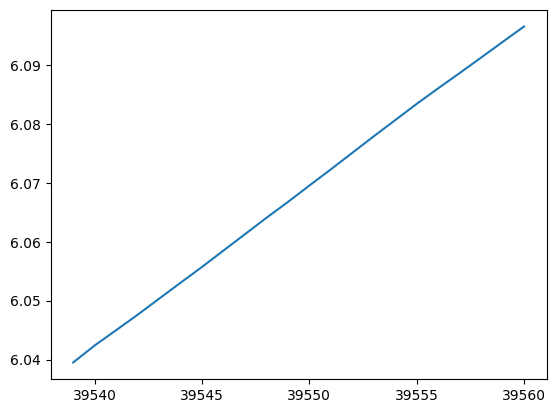

In [ ]:
fundo_especifico.VL_QUOTA.plot()

In [ ]:
comparativo.index = comparativo['DT_COMPTC']

In [ ]:
comparativo

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
DT_COMPTC,,,,,,,,,
2024-01-02,FI,07.593.972/0001-86,2024-01-02,1.613959e+11,6.039496,1.613956e+11,5.658653e+09,9.383000e+07,269
2024-01-03,FI,07.593.972/0001-86,2024-01-03,1.609550e+11,6.042376,1.609547e+11,2.410703e+08,7.589120e+08,269
2024-01-04,FI,07.593.972/0001-86,2024-01-04,1.605643e+11,6.044969,1.605640e+11,1.208963e+09,1.668800e+09,269
2024-01-05,FI,07.593.972/0001-86,2024-01-05,1.592774e+11,6.047594,1.592771e+11,1.250259e+09,2.606914e+09,268
2024-01-08,FI,07.593.972/0001-86,2024-01-08,1.579938e+11,6.050315,1.579935e+11,3.262723e+08,1.681468e+09,270
2024-01-09,FI,07.593.972/0001-86,2024-01-09,1.572987e+11,6.053027,1.572985e+11,2.820350e+08,1.047909e+09,262
2024-01-10,FI,07.593.972/0001-86,2024-01-10,1.564752e+11,6.055712,1.564749e+11,2.466836e+08,1.140009e+09,263
2024-01-11,FI,07.593.972/0001-86,2024-01-11,1.559525e+11,6.058497,1.559522e+11,2.628427e+08,8.575050e+08,263
2024-01-12,FI,07.593.972/0001-86,2024-01-12,1.562636e+11,6.061269,1.562633e+11,4.647340e+08,2.249781e+08,263


In [ ]:
comparativo.index = pd.to_datetime(comparativo.index)

**# 2 TRABALHANDO COM DADOS CADASTRAIS**

In [ ]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [ ]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')

<ipython-input-26-c85bfb431447>:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


In [ ]:
cadastral[cadastral['CNPJ_FUNDO'] == '07.593.972/0001-86']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12166,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


In [ ]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('VERDE')]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
3061,FACFIF,04.222.368/0001-55,VERDE PVT MULTIMERCADO FUNDO DE INVESTIMENTO E...,2003-04-30,2001-07-02,28401.0,2005-03-22,CANCELADA,2005-03-22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3112,FACFIF,04.260.640/0001-91,INVESTCENTER VERDE I MULTIMERCADO FUNDO DE INV...,2003-04-30,2000-12-27,28908.0,2005-03-15,CANCELADA,2005-03-15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,FACFIF,04.310.985/0001-02,HEDGING-GRIFFO VERDE LI FUNDO DE APLICACAO EM ...,2003-04-30,2001-03-30,29726.0,2003-11-20,CANCELADA,2003-11-20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,FACFIF,04.311.271/0001-19,PS VERDE D1 FUNDO DE INVESTIMENTO EM COTAS DE ...,2003-10-10,2003-10-10,45950.0,2005-03-21,CANCELADA,2005-03-21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3743,FACFIF,04.869.164/0001-00,FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE I...,2003-04-30,2003-01-02,39209.0,2005-02-02,CANCELADA,2005-02-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75034,FITVM,04.328.542/0001-49,CSHG VERDE AM CAMINO FUNDO DE INVESTIMENTO EM ...,2001-03-20,2001-03-05,6190.0,2005-03-10,CANCELADA,2005-03-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75085,FITVM,04.806.420/0001-10,CSHG VERDE AM BETA 14 FUNDO DE INVESTIMENTO EM...,2001-12-19,2001-11-23,6726.0,2005-03-14,CANCELADA,2005-03-14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75103,FITVM,04.895.113/0001-53,FIA R VERDE,2002-02-28,2002-01-30,6971.0,2006-07-06,CANCELADA,2006-07-06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75512,FMIA,56.100.290/0001-08,FMIA ACAO VERDE CREFISUL,1986-07-27,NaN,280.0,1996-03-22,CANCELADA,1996-03-22,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cadastral_relevantes = cadastral[['CNPJ_FUNDO',	'DENOM_SOCIAL', 'GESTOR']]

In [ ]:
fundos = informes_diarios.merge(cadastral_relevantes, how ='left', on = 'CNPJ_FUNDO')

In [ ]:
filtro = informes_diarios[informes_diarios['NR_COTST'] > 1000]

In [ ]:
desempenho = filtro.pivot(index = 'DT_COMPTC', columns = 'CNPJ_FUNDO', values = ['VL_QUOTA', 'VL_PATRIM_LIQ'])

In [ ]:
desempenho

VL_QUOTA                                        \
CNPJ_FUNDO 00.068.305/0001-35 00.071.477/0001-68 00.222.816/0001-60   
DT_COMPTC                                                             
2024-01-02          35.360849          12.622172       10273.180894   
2024-01-03          35.373998          12.626955       10278.281339   
2024-01-04          35.386270          12.632013       10280.913671   
2024-01-05          35.398927          12.636305       10284.294193   
2024-01-08          35.412490          12.640941       10287.231958   
2024-01-09          35.425732          12.645638       10290.158562   
2024-01-10          35.442513          12.650194       10294.161193   
2024-01-11          35.459246          12.654874       10299.009452   
2024-01-12          35.475477          12.659580       10303.172494   
2024-01-15          35.490908          12.664231       10307.482440   
2024-01-16          35.505122          12.668944       10309.783053   
2024-01-17          35.520161          12.673566       10313.515038   
2024-01-18          35.534621          12.678345       10316.616926   
2024-01-19          35.548462          12.683056       10321.537427   
2024-01-22          35.562010          12.687760       10324.342115   
2024-01-23          35.577032          12.692432       10330.093325   
2024-01-24          35.591828          12.697068       10335.162983   
2024-01-25          35.607277          12.701717       10341.991735   
2024-01-26          35.620980          12.706260       10347.756286   
2024-01-29          35.635258          12.710869       10349.255106   
2024-01-30          35.649652          12.715493       10351.730543   
2024-01-31          35.665634          12.720100       10357.607367   

                                                                     \
CNPJ_FUNDO 00.280.302/0001-60 00.306.278/0001-91 00.322.699/0001-06   
DT_COMPTC                                                             
2024-01-02        6336.323005          25.356678          18.163212   
2024-01-03        6339.359182          25.366332          18.170376   
2024-01-04        6342.112772          25.377877          18.180709   
2024-01-05        6345.041117          25.390053          18.188546   
2024-01-08        6347.426691          25.400369          18.196831   
2024-01-09        6349.799632          25.411342          18.204622   
2024-01-10        6352.156320          25.421880          18.212638   
2024-01-11        6356.654763          25.432848          18.221754   
2024-01-12        6359.990198          25.449430          18.235361   
2024-01-15        6362.877737          25.460827          18.243993   
2024-01-16        6364.045986          25.472317          18.252560   
2024-01-17        6366.254544          25.485508          18.263033   
2024-01-18        6369.155906          25.497161          18.271938   
2024-01-19        6372.294524          25.508853          18.281042   
2024-01-22        6374.745849          25.526951          18.296090   
2024-01-23        6378.742467          25.537855          18.304470   
2024-01-24        6381.422345          25.555731          18.315918   
2024-01-25        6384.645204          25.567829          18.324601   
2024-01-26        6387.230721          25.578792          18.333214   
2024-01-29        6389.501843          25.589501          18.341750   
2024-01-30        6391.623958          25.600524          18.350649   
2024-01-31        6394.707975          25.611742          18.359079   

                                                                     \
CNPJ_FUNDO 00.360.293/0001-18 00.398.561/0001-90 00.400.490/0001-13   
DT_COMPTC                                                             
2024-01-02          27.998767         209.204886       54700.619198   
2024-01-03          27.935492         209.113321       54599.717180   
2024-01-04          27.834980         205.595722       54579.505155   
2024-01-05          27.611390         207.7

In [ ]:
normalizado = desempenho/desempenho.iloc[0]

In [ ]:
normalizado.iloc[-1]

               CNPJ_FUNDO        
VL_QUOTA       00.068.305/0001-35    1.008619
               00.071.477/0001-68    1.007758
               00.222.816/0001-60    1.008218
               00.280.302/0001-60    1.009214
               00.306.278/0001-91    1.010059
                                       ...   
VL_PATRIM_LIQ  73.899.759/0001-21    0.956285
               88.002.696/0001-36    0.964621
               88.198.056/0001-43    0.940029
               97.519.703/0001-62    1.001713
               97.519.794/0001-36    0.980703
Name: 2024-01-31, Length: 3032, dtype: float64

In [ ]:
cotas_normalizadas = pd.DataFrame(normalizado.iloc[-1])

In [ ]:
cotas_normalizadas.sort_values('2024-01-31', ascending = False)[:5]

2024-01-31
              CNPJ_FUNDO                    
VL_PATRIM_LIQ 52.248.139/0001-52    1.901602
              51.998.694/0001-39    1.839109
              21.720.791/0001-02    1.645392
              52.280.036/0001-70    1.511223
              52.834.346/0001-99    1.501162